In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import joblib

In [ ]:
def load_images_from_folder(folder_path, label, image_size=(32, 32)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path).convert('L')  
            img = img.resize(image_size)
            img_array = np.array(img).flatten() 
            images.append(img_array)
            labels.append(label)
    return images, labels


In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None  
        self.b = None  

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights to zeros and bias to zero.
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Perform gradient descent for a fixed number of iterations.
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                
                if condition:
                    dw = 2 * self.lambda_param * self.w
                    db = 0
                else:
                    dw = 2 * self.lambda_param * self.w - np.dot(x_i, y[idx])
                
                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, -1)


In [ ]:
benign_path = "/mnt/myFiles/Dataset of Mammography with Benign Malignant Breast Masses/DDSM Dataset/Benign Masses"
malignant_path = "/mnt/myFiles/Dataset of Mammography with Benign Malignant Breast Masses/DDSM Dataset/Malignant Masses"

image_size = (32, 32)

benign_images, benign_labels = load_images_from_folder(benign_path, label=-1, image_size=image_size)
malignant_images, malignant_labels = load_images_from_folder(malignant_path, label=1, image_size=image_size)

X = np.array(benign_images + malignant_images)  
y = np.array(benign_labels + malignant_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
svm_model = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_model.fit(X_train, y_train)




Training Accuracy: 95.12%
Test Accuracy: 94.82%

Model Performance on Training Set:
Precision: 0.93
Recall: 0.99
F1-Score: 0.96

Model Performance on Test Set:
Precision: 0.92
Recall: 0.99
F1-Score: 0.95


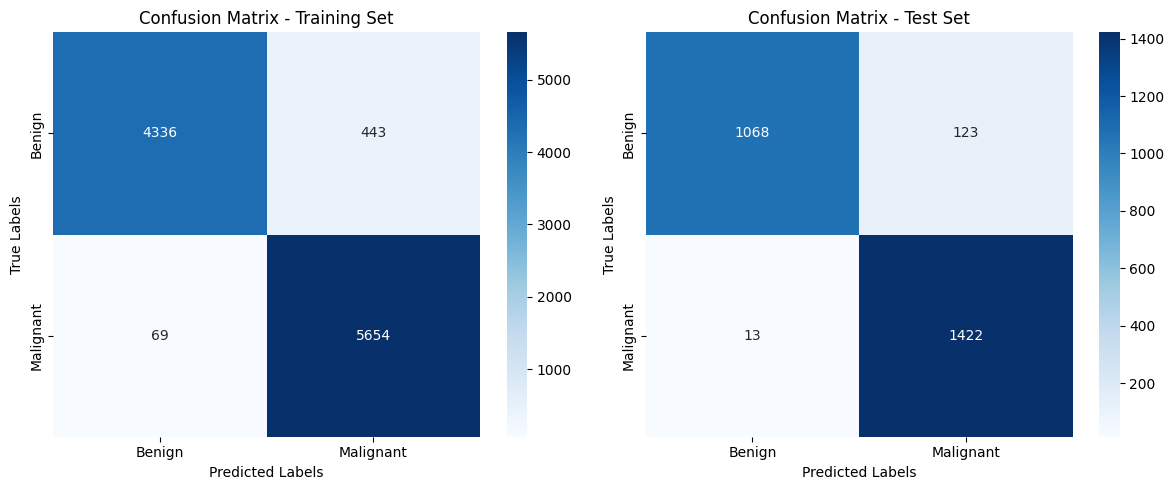

In [6]:
train_predictions = svm_model.predict(X_train)
test_predictions = svm_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate precision, recall, and F1-score for training set
train_precision = precision_score(y_train, train_predictions, average='binary', pos_label=1)
train_recall = recall_score(y_train, train_predictions, average='binary', pos_label=1)
train_f1 = f1_score(y_train, train_predictions, average='binary', pos_label=1)

# Calculate precision, recall, and F1-score for test set
test_precision = precision_score(y_test, test_predictions, average='binary', pos_label=1)
test_recall = recall_score(y_test, test_predictions, average='binary', pos_label=1)
test_f1 = f1_score(y_test, test_predictions, average='binary', pos_label=1)

print("\nModel Performance on Training Set:")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-Score: {train_f1:.2f}")

print("\nModel Performance on Test Set:")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-Score: {test_f1:.2f}")

# Confusion Matrices
train_cm = confusion_matrix(y_train, train_predictions)
test_cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')
axes[0].set_ylabel('True Labels')
axes[0].set_xlabel('Predicted Labels')

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'], ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
axes[1].set_ylabel('True Labels')
axes[1].set_xlabel('Predicted Labels')

plt.tight_layout()
plt.show()


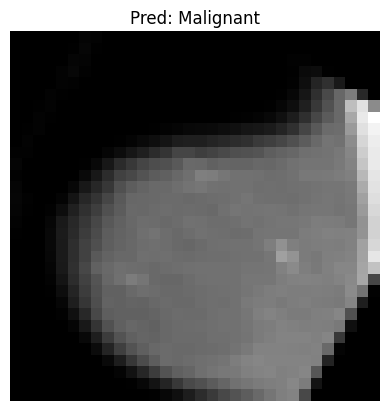

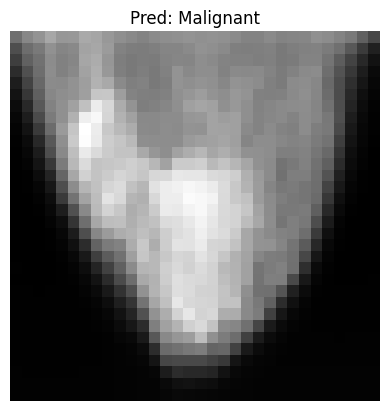

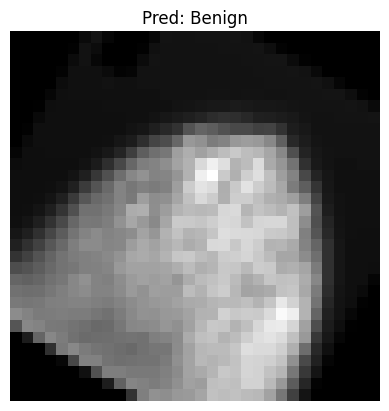

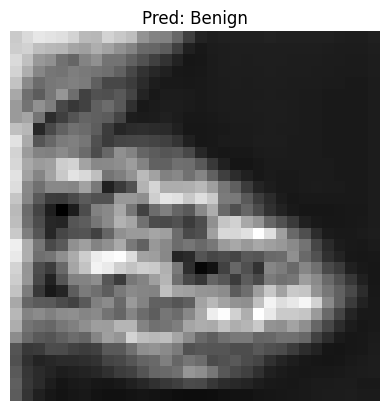

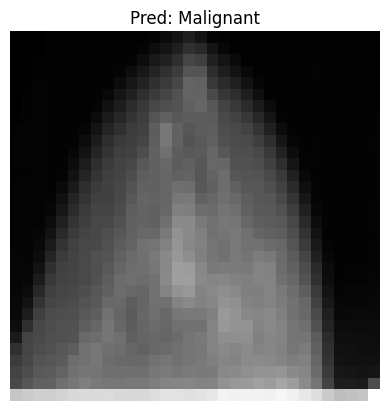

In [7]:
# Visualize some of the test images along with their predicted labels 
for i in range(5):  # Display first 5 test images with predictions
    plt.imshow(X_test[i].reshape(image_size), cmap='gray')  # Reshape to original image size for display
    plt.title(f"Pred: {'Malignant' if test_predictions[i] == 1 else 'Benign'}")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


In [8]:
# Save the trained model using joblib 
joblib.dump(svm_model, 'svm_model.pkl')
print("Model saved as 'svm_model.pkl'")


Model saved as 'svm_model.pkl'


In [9]:
# Model Information (System Info) - Extracting after training
model_info = {
    "Model Type": "Linear SVM",
    "Training Accuracy": f"{train_accuracy * 100:.2f}%",
    "Test Accuracy": f"{test_accuracy * 100:.2f}%",
    "Test Precision": f"{test_precision:.2f}",  # Overall precision for the test set
    "Test Recall": f"{test_recall:.2f}",        # Overall recall for the test set
    "Test F1-Score": f"{test_f1:.2f}",          # Overall F1 score for the test set
    "Learning Rate": svm_model.lr,
    "Lambda Parameter": svm_model.lambda_param,
    "Number of Iterations": svm_model.n_iters,
    "Image Size": image_size,
    "Number of Features": X_train.shape[1],
    "Number of Training Samples": X_train.shape[0],
    "Number of Testing Samples": X_test.shape[0],
    "Train Confusion Matrix": train_cm.tolist(),  # Convert to list for serialization
    "Test Confusion Matrix": test_cm.tolist(),  # Convert to list for serialization
}

print("\nModel Information:")
for key, value in model_info.items():
    print(f"{key}: {value}")



Model Information:
Model Type: Linear SVM
Training Accuracy: 95.12%
Test Accuracy: 94.82%
Test Precision: 0.92
Test Recall: 0.99
Test F1-Score: 0.95
Learning Rate: 0.001
Lambda Parameter: 0.01
Number of Iterations: 1000
Image Size: (32, 32)
Number of Features: 1024
Number of Training Samples: 10502
Number of Testing Samples: 2626
Train Confusion Matrix: [[4336, 443], [69, 5654]]
Test Confusion Matrix: [[1068, 123], [13, 1422]]
